In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Preparing Dataset
dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.5)
X = dataset.data
y = dataset.target
target_names = dataset.target_names
images = dataset.images

In [3]:
X.shape

(1140, 2914)

In [4]:
n, h, w = images.shape
print(len(target_names))
np.unique(y, return_counts = True)

5


(array([0, 1, 2, 3, 4], dtype=int64),
 array([236, 121, 530, 109, 144], dtype=int64))

In [5]:
print(n)
print(h)
print(w)

1140
62
47


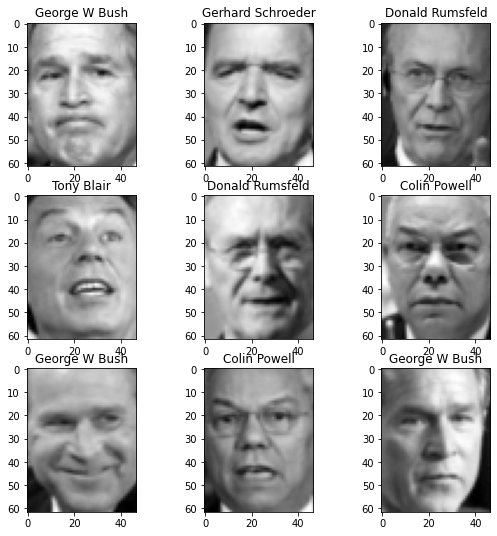

In [6]:
# Plot the images
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(3*cols, 3*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title(target_names[titles[i]])
plot_img(X, y, h, w)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [8]:
X_train.shape

(1026, 2914)

In [9]:
pca = PCA()
pca.fit(X_train)

PCA()

In [10]:
pca.transform(X_train).shape

(1026, 1026)

In [11]:
var = pca.explained_variance_
print(var)
comp = pca.components_
print(comp.shape)

[7.4595106e+05 6.3484488e+05 2.9723006e+05 ... 3.3083797e+00 3.0296762e+00
 7.0287260e-06]
(1026, 2914)


In [12]:
val_sum = np.sum(var)
print(val_sum)
sort_indx = np.argsort(var)
sort_indx = sort_indx[::-1]
print(sort_indx)

4157698.5
[   0    1    2 ... 1023 1024 1025]


In [13]:
temp_sum = 0
principal_vec = []
principal_val = []
i = 0
while (temp_sum < 0.98*val_sum):
    principal_vec.append(comp[sort_indx[i], :])
    principal_val.append(var[sort_indx[i]])
    temp_sum += var[sort_indx[i]]
    i += 1
print("Number of components : {}".format(i))

Number of components : 272


In [14]:
principal_vec = np.matrix(principal_vec)
print(principal_vec.shape)

(272, 2914)


In [15]:
X_train_transf = np.dot(X_train, principal_vec.T)
X_test_transf = np.dot(X_test, principal_vec.T)

In [16]:
X_train_transf.shape

(1026, 272)

In [17]:
clf = MLPClassifier(hidden_layer_sizes = (1024, ), batch_size = 128, verbose = True, early_stopping = True)
clf.fit(X_train_transf, y_train)

Iteration 1, loss = 10.61736560
Validation score: 0.310680
Iteration 2, loss = 8.39584711
Validation score: 0.563107
Iteration 3, loss = 4.93206859
Validation score: 0.728155
Iteration 4, loss = 2.82219358
Validation score: 0.825243
Iteration 5, loss = 1.47848717
Validation score: 0.766990
Iteration 6, loss = 1.10109111
Validation score: 0.815534
Iteration 7, loss = 0.64148275
Validation score: 0.893204
Iteration 8, loss = 0.27229749
Validation score: 0.854369
Iteration 9, loss = 0.19110324
Validation score: 0.844660
Iteration 10, loss = 0.12463492
Validation score: 0.864078
Iteration 11, loss = 0.02047752
Validation score: 0.834951
Iteration 12, loss = 0.04510197
Validation score: 0.854369
Iteration 13, loss = 0.04482527
Validation score: 0.854369
Iteration 14, loss = 0.04701795
Validation score: 0.864078
Iteration 15, loss = 0.07210707
Validation score: 0.844660
Iteration 16, loss = 0.02958050
Validation score: 0.854369
Iteration 17, loss = 0.01112495
Validation score: 0.844660
Itera

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [18]:
y_pred = clf.predict(X_test_transf)
print(classification_report(y_test, y_pred, target_names = target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.90      0.83      0.86        23
  Donald Rumsfeld       0.85      0.85      0.85        13
    George W Bush       0.91      0.82      0.86        50
Gerhard Schroeder       0.64      0.64      0.64        11
       Tony Blair       0.71      1.00      0.83        17

         accuracy                           0.83       114
        macro avg       0.80      0.83      0.81       114
     weighted avg       0.85      0.83      0.83       114



In [19]:
# Plot the images after applying pca
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(4*cols, 4*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title([titles[i]])

In [20]:
n_components = 272
mean_imgs = []
for i in range(n_components):
    vec = principal_vec[i,:]
    img = vec.reshape((h, w))
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(272, 62, 47)


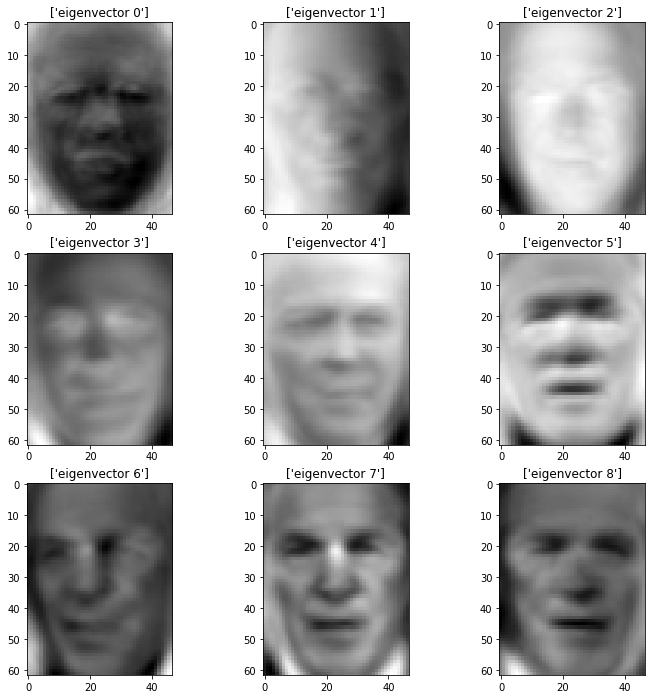

In [21]:
pca_titles = [f"eigenvector {i}" for i in range(n_components)]
plot_img(mean_imgs, pca_titles, h, w)